<a href="https://colab.research.google.com/github/ErickPol0/PortfolioProject/blob/main/Segmentaci%C3%B3n_de_documentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

A diferencia de aprendizaje supervisado, en donde los datos que entrenamos vienen etiquetados, en aprendizaje no supervisado las observaciones no vienen acompañadas con una etiqueta. En esencia con aprendizaje no supervisado, cuando el modelo reciba los datos no etiquetados, el modelo pretenderá aprender algún patron que estructure de mejor manera los datos para que de esta manera se pueda extraer información que sea util. Una tecnica muy popular en aprendizaje no supervisado es la de k-medias, la técnica se basa básicamente en agrupar los puntos (observaciones) de acuerdo a la distancia que tengan con respecto a unos puntos que serán representativos del total de grupos que se establezcan. Para ello sera necesario conocer antes el numero de puntos  representativos o de grupos que mejor representen a los datos.

Como practica de este método, se nos da un conjunto de datos acerca de unos documentos que se escribieron para las conferencias de sistemas de procesamiento de información neuronal que se  han llevado a cabo desde 1987 hasta 2019. Dentro de este conjunto de datos existe una columna que representa el texto completo de los documentos y la idea es agrupar estos documentos de acuerdo a las palabras que se mencionan dentro de ellas, seguramente los terminemos categorizando. 

Importamos las librerías necesarias

In [ ]:
# Estructura de datos
import numpy  as np
import pandas as pd

# Procesamiento corpus
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import string
import nltk

# K-Means
from sklearn.cluster import KMeans
from sklearn import cluster

# Visualizacion y analisis
from matplotlib import pyplot as plt
from sklearn import metrics
from wordcloud import WordCloud

Cargamos los datos y los analizamos.

In [ ]:
data = pd.read_csv('papers.csv',encoding='utf-8')
data.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source_id  9680 non-null   int64 
 1   year       9680 non-null   int64 
 2   title      9680 non-null   object
 3   abstract   6361 non-null   object
 4   full_text  9677 non-null   object
dtypes: int64(2), object(3)
memory usage: 378.2+ KB


 Como podemos observar existen observaciones en donde la columna full_text esta vacío, si los ignoramos no podremos crear la matriz de frecuencia de términos.

# Pre-proceso

Como el enfoque es dirigido a la columna full_text simplemente borramos esas observaciones en donde se encuentren estos vacíos, pues no hay otra manera de llenarlos y no alterarían mucho pues solo son 3 las observaciones nulas.

In [ ]:
data = data.dropna(subset=['full_text'])

Nos encargamos ahora de eliminar los números y algunos caracteres especiales que puedan haber en los documentos pues estos no nos serían muy útiles a la hora de agrupar.

In [ ]:
data = data.astype(str).apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), '', regex=True)) # eliminamos guiones bajos
corpus = data['full_text'].tolist()
for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Reemplaza el simbolo ASCII '�' con '8'
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removemos caracteres especiales
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removemos numeros y palabras concatenados con numeros
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removemos correos y menciones
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removemos urls con https
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removemos urls con www

Creamos nuestra matriz de frecuencia de términos además de eliminar stop words. 

In [ ]:
vector = TfidfVectorizer(stop_words='english') 
X = vector.fit_transform(corpus)

Este es nuestra matriz de frecuencia de términos, el primer numero en la tupla corresponde al documento, el segundo numero corresponde al numero que se le atribuye a una palabra en cuestión, y el tercer numero a la derecha es el peso que tiene esa palabra en el documento.

In [ ]:
print(X)

  (0, 113928)	0.00959640691152924
  (0, 190190)	0.008270131721995755
  (0, 242148)	0.01057073570086786
  (0, 105863)	0.015886622810689026
  (0, 235229)	0.014762370599702857
  (0, 207189)	0.012556956959419198
  (0, 132208)	0.023892532065872177
  (0, 173668)	0.013067140539371866
  (0, 104146)	0.01865416255646577
  (0, 48632)	0.00991863134348026
  (0, 197304)	0.01330039318032758
  (0, 95204)	0.011950439868477566
  (0, 253612)	0.006998659577815599
  (0, 90723)	0.00359141698699692
  (0, 274282)	0.005122667545300193
  (0, 146285)	0.007083264951770306
  (0, 355082)	0.007522558496988674
  (0, 129998)	0.006486012006236869
  (0, 283267)	0.010386776386304364
  (0, 308187)	0.008661435729972466
  (0, 252762)	0.0039472822500921465
  (0, 288323)	0.005644330038575503
  (0, 66524)	0.022146408896070044
  (0, 192927)	0.016908039386663635
  (0, 41026)	0.011364228090049342
  :	:
  (9676, 93681)	0.004024945168742917
  (9676, 141804)	0.003364127220542199
  (9676, 274245)	0.008781336331557279
  (9676, 163427)

# Agrupamiento

Lo primero que debemos de hacer es establecer el valor de k grupos, para ello utilizamos el método elbow. Y buscamos entre un rango de 2 y 10.

In [ ]:
distorciones = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distorciones.append(kmeanModel.inertia_)
    print(k)

2
3
4
5
6
7
8
9
10


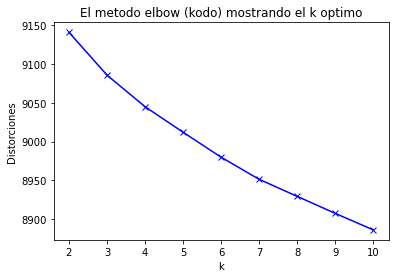

In [ ]:
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# Plot the elbow
plt.plot(K, distorciones, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorciones')
plt.title('El metodo elbow (kodo) mostrando el k optimo')
plt.show()

Para este método, las mejoras disminuyen, en algún momento rápidamente, creando la forma de un codo, por eso el nombre de elbow. Ese punto será el valor óptimo para K. en nuestro caso podemos observar que es 7. Y ahora procedemos a crear nuestro modelo k-means.

In [ ]:
k = 7
model = KMeans(n_clusters=k, max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=7, n_init=1)

# Resultados

Ahora que esta listo nuestro modelo,  podemos ver las palabras mejor puntuados en cada grupo, y para hacerlo más bonito e interesante hacemos un mapa de palabras de cada grupo.

In [ ]:
# Transforma un df centroide a un diccionario para ser usado en el wordcloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

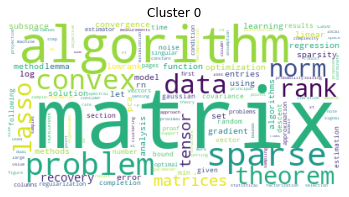

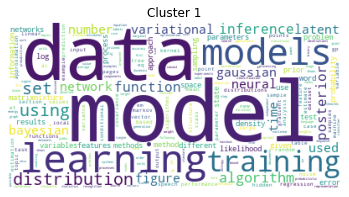

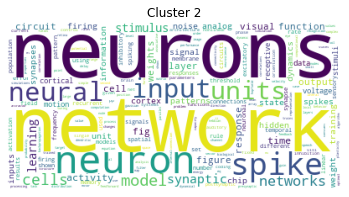

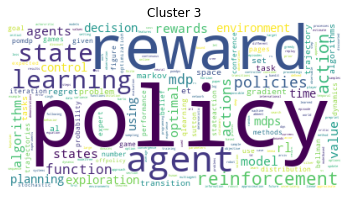

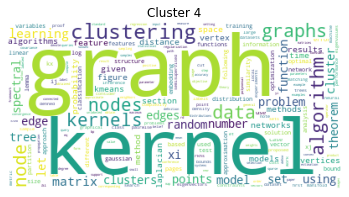

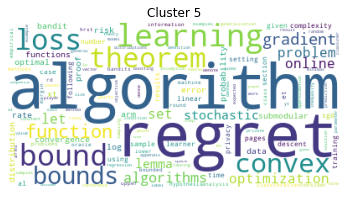

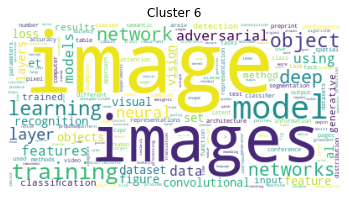

In [ ]:
centroids = pd.DataFrame(model.cluster_centers_)
centroids.columns = vector.get_feature_names()
generateWordClouds(centroids)

Analizando un poco las nubes nos podemos dar una idea de que perfil tiene cada grupo.
- Para el cluster 0, las palabras que mas sobresalen son las de matriz y algoritmo, un poco mas abajo vemos palabras como inverso y norma. Por lo que podemos concluir que en el cluster 0 se agruparon documentos con temas relacionados a algebra lineal. 
- Para cluster 1, las palabras mas sobresalientes son las de "data" y "model", y de fondo aprendizaje y entrenamiento, por lo que podemos decir que seguramente se agruparon documentos que hablan de manera general de modelos de aprendizaje. 
- Para cluster 2, las palabras mas sobresalientes son las de "neurons" y "network", por lo que podemos decir que seguramente se agruparon documentos que hablan de redes neuronales.
- Para cluster 3, las palabras mas sobresalientes son las de "reward" y "policy",  y de fondo "agent", por lo que podemos decir que seguramente se agruparon documentos que hablan acerca de las funciones de politica y recompensa en aprendizaje por reforzamiento.
- Para cluster 4, las palabras mas sobresalientes son las de "graph" y "kernel", por lo que podemos decir que seguramente se agruparon documentos que hablan acerca de structure mining.
- Para cluster 5, las palabras mas sobresalientes son las de "algorithm" y "regret",  y de fondo "loss", por lo que podemos decir que seguramente se agruparon documentos que hablan acerca de las funciones de costo en aprendizaje por reforzamiento.
- Para cluster 6, las palabras mas sobresalientes son las de "image" e "images",  y de fondo vemos muchas palabras relacionadas a las redes neuronales, por lo que seguramente se agruparon documentos que hablan acerca de como utilizar las redes neuronales para reconocer imagenes.

# Referencias

- kmeans elbow method https://pythonprogramminglanguage.com/kmeans-elbow-method/
- Wordcloud https://medium.com/@lucasdesa/text-clustering-with-k-means-a039d84a941b